In [1]:
import torch
import matplotlib.pyplot as plt
import gym
import numpy as np
from scipy.signal import savgol_filter
from time import sleep

from REINFORCE import MCPGAgent

In [11]:
def show_video(agent, env, sleep_sec: float = 0.01, mode: str = "rgb_array"):
    state = env.reset()
    state_size = env.observation_space.shape[0]

    if mode == "rgb_array":
        steps = 0
        fig, ax = plt.subplots(figsize=(8, 6))

    done = False
    while not done:
        state = np.reshape(state, [1, state_size])
        action = agent.act(state)

        state, _, done, _ = env.step(action)

        if mode == "rgb_array":
            steps += 1
            frame = env.render()
            ax.cla()
            ax.axes.yaxis.set_visible(False)
            ax.imshow(frame)
            ax.set_title(f'Steps: {steps}')
            display(fig)
            clear_output(wait=True)
            plt.pause(sleep_sec)
        else:
            env.render()
            sleep(sleep_sec)


In [3]:
# initialize environment
env = gym.make('LunarLander-v2')
action_size = env.action_space.n
state_size = env.observation_space.shape[0]

# set seed
seed = 31
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)


# hyperparameters
episodes = 10 # run agent for this many episodes
hidden_size = 256 # number of units in NN hidden layers
actor_lr = 0.002 # learning rate for actor
value_function_lr = 0.002 # learning rate for value function
discount = 0.99 # discount factor gamma value
reward_scale = 0.01 #scale reward by this amount

# create agent
agent = MCPGAgent(state_size, 
                action_size, 
                actor_lr, 
                value_function_lr, 
                discount,
                hidden_size)

In [4]:
# load the saved actor and value function networks
agent.actor_net.load_state_dict(torch.load('Trained_Agents/MC_actor.pth'))
agent.vf_net.load_state_dict(torch.load('Trained_Agents/MC_valueF.pth'))

<All keys matched successfully>

In [5]:
# set the agent to evaluation mode
agent.actor_net.eval()
agent.vf_net.eval()

# run the agent for a few episodes and print the total reward for each episode
cumulative_reward = 0
for i in range(10):
    state = env.reset()
    done = False
    total_reward = 0
    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        state = next_state
    print(f'Episode {i+1}/10, total reward: {total_reward:.2f}')


Episode 1/10, total reward: 91.95
Episode 2/10, total reward: 65.24
Episode 3/10, total reward: 110.31
Episode 4/10, total reward: 127.36
Episode 5/10, total reward: 96.32
Episode 6/10, total reward: 120.42
Episode 7/10, total reward: 119.32
Episode 8/10, total reward: 151.78
Episode 9/10, total reward: 49.19
Episode 10/10, total reward: 107.58


TypeError: Invalid shape () for image data

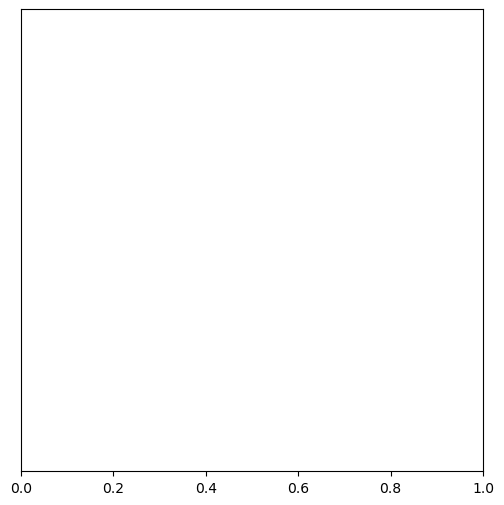

: 

In [12]:
# no seed so different each time
# the goal is to reach an average score on training of at least 200 so that each run is a win
show_video(agent, env, sleep_sec=1e-5)
env.close()